# Machine Learning Trading Bot

In this Challenge, you’ll assume the role of a financial advisor at one of the top five financial advisory firms in the world. Your firm constantly competes with the other major firms to manage and automatically trade assets in a highly dynamic environment. In recent years, your firm has heavily profited by using computer algorithms that can buy and sell faster than human traders.

The speed of these transactions gave your firm a competitive advantage early on. But, people still need to specifically program these systems, which limits their ability to adapt to new data. You’re thus planning to improve the existing algorithmic trading systems and maintain the firm’s competitive advantage in the market. To do so, you’ll enhance the existing trading signals with machine learning algorithms that can adapt to new data.

## Instructions:

Use the starter code file to complete the steps that the instructions outline. The steps for this Challenge are divided into the following sections:

* Establish a Baseline Performance

* Tune the Baseline Trading Algorithm

* Evaluate a New Machine Learning Classifier

* Create an Evaluation Report

#### Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 

1. Import the OHLCV dataset into a Pandas DataFrame.

2. Generate trading signals using short- and long-window SMA values. 

3. Split the data into training and testing datasets.

4. Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

5. Review the classification report associated with the `SVC` model predictions. 

6. Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

7. Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

8. Write your conclusions about the performance of the baseline trading algorithm in the `README.md` file that’s associated with your GitHub repository. Support your findings by using the PNG image that you saved in the previous step.

#### Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. (You’ll choose the best by comparing the cumulative products of the strategy returns.) To do so, complete the following steps:

1. Tune the training algorithm by adjusting the size of the training dataset. To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing the training window?

> **Hint** To adjust the size of the training dataset, you can use a different `DateOffset` value&mdash;for example, six months. Be aware that changing the size of the training dataset also affects the size of the testing dataset.

2. Tune the trading algorithm by adjusting the SMA input features. Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

3. Choose the set of parameters that best improved the trading algorithm returns. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

#### Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. To do so, complete the following steps:

1. Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

2. Using the original training data as the baseline model, fit another model with the new classifier.

3. Backtest the new model to evaluate its performance. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. Answer the following questions: Did this new model perform better or worse than the provided baseline model? Did this new model perform better or worse than your tuned trading algorithm?

#### Create an Evaluation Report

In the previous sections, you updated your `README.md` file with your conclusions. To accomplish this section, you need to add a summary evaluation report at the end of the `README.md` file. For this report, express your final conclusions and analysis. Support your findings by using the PNG images that you created.


In [114]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

---

## Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 


### Step 1: mport the OHLCV dataset into a Pandas DataFrame.

In [115]:
# Import the OHLCV dataset into a Pandas Dataframe
ohlcv_df = pd.read_csv(
    Path("./Resources/emerging_markets_ohlcv.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
print(ohlcv_df.head())
print(ohlcv_df.tail())

                      open   high    low  close  volume
date                                                   
2015-01-21 09:30:00  23.83  23.83  23.83  23.83     100
2015-01-21 11:00:00  23.98  23.98  23.98  23.98     100
2015-01-22 15:00:00  24.42  24.42  24.42  24.42     100
2015-01-22 15:15:00  24.42  24.44  24.42  24.44     200
2015-01-22 15:30:00  24.46  24.46  24.46  24.46     200
                      open   high    low  close  volume
date                                                   
2021-01-22 09:30:00  33.27  33.27  33.27  33.27     100
2021-01-22 11:30:00  33.35  33.35  33.35  33.35     200
2021-01-22 13:45:00  33.42  33.42  33.42  33.42     200
2021-01-22 14:30:00  33.47  33.47  33.47  33.47     200
2021-01-22 15:45:00  33.47  33.47  33.44  33.44     783


In [116]:
ohlcv_df.shape

(4323, 5)

In [117]:
# Filter the date index and close columns
signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
signals_df["Actual Returns"] = signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns
date,,
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818
2015-01-26 12:30:00,24.33,-0.005315


,close,Actual Returns
date,,
2021-01-22 09:30:00,33.27,-0.006866
2021-01-22 11:30:00,33.35,0.002405
2021-01-22 13:45:00,33.42,0.002099
2021-01-22 14:30:00,33.47,0.001496
2021-01-22 15:45:00,33.44,-0.000896


## Step 2: Generate trading signals using short- and long-window SMA values. 

In [118]:
# Set the short window and long window
short_window = 4
long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463


,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495


In [119]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0


In [120]:
signals_df['Signal'].value_counts()

 1.0    2368
-1.0    1855
Name: Signal, dtype: int64

In [121]:
# Calculate the strategy returns and add them to the signals_df DataFrame
# Observe that the signal considered is the one from the previous period, 
# because that is the prediction we would like to have given
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0,NaN
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0,0.000000
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0,0.000803
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0,0.000401
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0,0.001202


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0,-0.006866
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0,-0.002405
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0,0.002099
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0,0.001496
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0,-0.000896


<AxesSubplot:xlabel='date'>

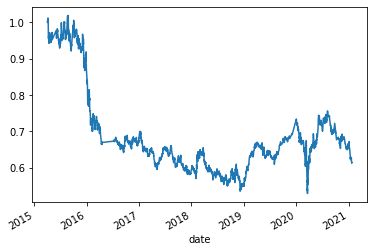

In [122]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy Returns']).cumprod().plot()

### Step 3: Split the data into training and testing datasets.

In [123]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [124]:
# Create the target set selecting the Signal column and assigning it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

 1.0    2368
-1.0    1855
Name: Signal, dtype: int64

In [125]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2015-04-02 15:00:00


In [126]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2015-07-02 15:00:00


In [127]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [128]:
len(X_train)

128

In [129]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [130]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [131]:
print(X_train_scaled.shape)
print(y_train.shape)

(128, 2)
(128,)


### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [132]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred


array([1., 1., 1., ..., 1., 1., 1.])

### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [133]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print("      Baseline SVM Classification Report on Test Data")
print(svm_testing_report)


      Baseline SVM Classification Report on Test Data
              precision    recall  f1-score   support

        -1.0       0.43      0.04      0.07      1804
         1.0       0.56      0.96      0.71      2288

    accuracy                           0.55      4092
   macro avg       0.49      0.50      0.39      4092
weighted avg       0.50      0.55      0.43      4092



### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [134]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_model.predict(X_test_scaled)
predictions_df['Predicted'].value_counts()

 1.0    3931
-1.0     161
Name: Predicted, dtype: int64

In [135]:
# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = signals_df['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Predicted'] * predictions_df['Actual Returns'] 

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2015-07-06 10:00:00,1.0,-0.025715,-0.025715
2015-07-06 10:45:00,1.0,0.007237,0.007237
2015-07-06 14:15:00,1.0,-0.009721,-0.009721
2015-07-06 14:30:00,1.0,-0.003841,-0.003841
2015-07-07 11:30:00,1.0,-0.018423,-0.018423


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496
2021-01-22 15:45:00,1.0,-0.000896,-0.000896


In [136]:
cum_actual=(1+predictions_df['Actual Returns']).cumprod()-1
cum_pred=(1+predictions_df['Strategy Returns']).cumprod()-1
print(cum_actual[-1])
print(cum_pred[-1])

0.38697635835753075
0.5176073996926798


In [137]:
predictions_df['Predicted'].value_counts()

 1.0    3931
-1.0     161
Name: Predicted, dtype: int64

In [138]:
comparison=pd.concat([y,predictions_df['Predicted']], axis=1)
comparison[comparison['Signal']!=comparison['Predicted']]
comparison

,Signal,Predicted
date,,
2015-04-02 14:45:00,1.0,NaN
2015-04-02 15:00:00,1.0,NaN
2015-04-02 15:15:00,1.0,NaN
2015-04-02 15:30:00,1.0,NaN
2015-04-02 15:45:00,1.0,NaN
...,...,...
2021-01-22 09:30:00,-1.0,1.0
2021-01-22 11:30:00,1.0,1.0
2021-01-22 13:45:00,1.0,1.0


### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

In [139]:
# Plot the actual returns versus the strategy returns
predictions_df['Original Cummulative Return']=(1+predictions_df['Actual Returns']).cumprod()
predictions_df['Machine Learning Strategy Cummulative Return']=(1+predictions_df['Strategy Returns']).cumprod()

predictions_df.hvplot.line(
    y=['Original Cummulative Return', 'Machine Learning Strategy Cummulative Return'],
    title='Comparative: Cummultive Original Returns and the SVM Baseline Strategy',
    width = 900,
    legend='bottom'
    
)


:NdOverlay   [Variable]
   :Curve   [date]   (value)

# NOTICE A CHANGE IN THE ORIGINAL ORDER. 
I will test first the new machine learning model AdaBoost, and then will tune the SVM.

---

## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. 

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [140]:
# Import a new classifier from SKLearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initiate the model instance
adaboost_model=AdaBoostClassifier(n_estimators=50)
adaboost_model

AdaBoostClassifier()

### Step 2: Using the original training data as the baseline model, fit another model with the new classifier.

In [141]:
# Fit the model using the training data
model = adaboost_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred_adaboost = adaboost_model.predict(X_test_scaled)

# Review the model's predicted values
pred_adaboost


array([ 1., -1., -1., ...,  1.,  1.,  1.])

### Step 3: Backtest the new model to evaluate its performance. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. 

Answer the following questions: 
Did this new model perform better or worse than the provided baseline model? 
Did this new model perform better or worse than your tuned trading algorithm?

In [142]:
# Use a classification report to evaluate the model using the predictions and testing data
adaboost_report=classification_report(y_test, pred_adaboost)

# Print the classification report
print("         AdaBoost Classification Report")
print(adaboost_report)

print(f"\n    Support Vector Machine Classification Report")
print(svm_testing_report)


         AdaBoost Classification Report
              precision    recall  f1-score   support

        -1.0       0.44      0.08      0.13      1804
         1.0       0.56      0.92      0.70      2288

    accuracy                           0.55      4092
   macro avg       0.50      0.50      0.41      4092
weighted avg       0.51      0.55      0.45      4092


    Support Vector Machine Classification Report
              precision    recall  f1-score   support

        -1.0       0.43      0.04      0.07      1804
         1.0       0.56      0.96      0.71      2288

    accuracy                           0.55      4092
   macro avg       0.49      0.50      0.39      4092
weighted avg       0.50      0.55      0.43      4092



In [143]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_adaboost_df=pd.DataFrame(index=X_test.index)

# Add the AdaBoost model predictions to the DataFrame
predictions_adaboost_df['Predictions AdaBoost']=pred_adaboost

# Add the actual returns to the DataFrame
predictions_adaboost_df['Actual Returns'] = signals_df['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_adaboost_df['AdaBoost Returns'] = predictions_adaboost_df['Predictions AdaBoost']* predictions_adaboost_df['Actual Returns'] 

# Review the DataFrame
predictions_adaboost_df.head()



,Predictions AdaBoost,Actual Returns,AdaBoost Returns
date,,,
2015-07-06 10:00:00,1.0,-0.025715,-0.025715
2015-07-06 10:45:00,-1.0,0.007237,-0.007237
2015-07-06 14:15:00,-1.0,-0.009721,0.009721
2015-07-06 14:30:00,-1.0,-0.003841,0.003841
2015-07-07 11:30:00,-1.0,-0.018423,0.018423


In [144]:
# Plot the actual returns versus the strategy returns
predictions_adaboost_df.hvplot(
        y=['Actual Returns','AdaBoost Returns'],
        width=1000,
        title='Comparative: Returns for the Technical Indicator Strategy versus AdaBoost ML Strategy',
        legend='bottom'
)


:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [145]:
predictions_adaboost_df['Actual Returns'].describe()
#,'AdaBoost Returns']

count    4092.000000
mean        0.000102
std         0.006677
min        -0.073561
25%        -0.001417
50%         0.000000
75%         0.001554
max         0.065027
Name: Actual Returns, dtype: float64

In [146]:
# Plot cummulative returns
predictions_adaboost_df['Original Cummulative Return']=(1+predictions_adaboost_df['Actual Returns']).cumprod()
predictions_adaboost_df['AdaBoost Cummulative Return']=(1+predictions_adaboost_df['AdaBoost Returns']).cumprod()

predictions_adaboost_df.hvplot(
        y=['Original Cummulative Return','AdaBoost Cummulative Return'],
        width=800,
        title='Comparative: Cummulative Return of Actual Returns versus AdaBoost ML Strategy',
        legend='bottom'
)

:NdOverlay   [Variable]
   :Curve   [date]   (value)

---

## Tune the Baseline Trading Algorithm

## Step 6: Use an Alternative ML Model and Evaluate Strategy Returns

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset. 

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing the training window?

### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

### Step 3: Choose the set of parameters that best improved the trading algorithm returns. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

In [27]:
# Step 1: Slice data into different periods



In [153]:
results_slicing=[]

for months_for_split in range(1,55):
# Select the start & end of the training period
    training_begin = X.index.min()
    training_end = X.index.min() + DateOffset(months=months_for_split)

    # Generate the X_train, y_train, X_test, and y_test DataFrames
    X_train = X.loc[training_begin:training_end]
    y_train = y.loc[training_begin:training_end]
    X_test  = X.loc[training_end+DateOffset(hours=1):]
    y_test  = y.loc[training_end+DateOffset(hours=1):]

    # Scale the features DataFrames
    # Create a StandardScaler instance
    scaler = StandardScaler()

    # Apply the scaler model to fit the X-train data
    X_scaler = scaler.fit(X_train)

    # Transform the X_train and X_test DataFrames using the X_scaler
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # From SVM, instantiate SVC classifier model instance, fit and predict
    svm_model = svm.SVC()
    svm_model = svm_model.fit(X_train_scaled, y_train)
    svm_pred = svm_model.predict(X_test_scaled)
    

    # Create a predictions DataFrame, and add predictions, actual returns, and strategy returns
    predictions_df = pd.DataFrame(index=X_test.index)
    predictions_df['Predicted'] = svm_model.predict(X_test_scaled)
    predictions_df['Actual Returns'] = signals_df['Actual Returns']
    predictions_df['Strategy Returns'] = predictions_df['Predicted'] * predictions_df['Actual Returns'] 
    
    
    # ROI in the testing window
    ROI_actual=(1+predictions_df['Actual Returns']).cumprod()-1
    ROI_pred=(1+predictions_df['Strategy Returns']).cumprod()-1
    number_of_short_predictions=predictions_df['Predicted'].loc[ predictions_df['Predicted']==-1].count()
   
    results_slicing.append(
        {'Months': months_for_split, 
         'Accuracy':accuracy_score(y_test, svm_pred), 
         'ROI Predicted (%)':ROI_pred[-1]*100, 
         'ROI Actual (%)':ROI_actual[-1]*100,
         '# of Short signals':number_of_short_predictions
         
    })

#### Checking into values with more short signals
SInce the accuracy is low, and there are so many long predictions, below I checked on cases with more negative predictions. However, increasing the number of -1 predictions does not generate better performance necesarily.

In [165]:
results_slicing_df=pd.DataFrame(results_slicing)
results_slicing_df.sort_values(by='ROI Predicted (%)', ascending=False, inplace=True)
results_slicing_df.reset_index(drop=True,inplace=True)
results_slicing_df


,Months,Accuracy,ROI Predicted (%),ROI Actual (%),# of Short signals
0,20,0.565530,88.405812,57.884797,27
1,19,0.564829,88.305666,54.172430,11
2,6,0.558204,84.166422,56.042930,86
3,7,0.555641,81.002770,51.861944,196
4,10,0.561974,70.812392,78.632479,91
5,11,0.564410,70.438328,70.438328,0
6,23,0.562932,70.315671,49.686661,124
7,22,0.560652,66.430747,52.380952,93
8,18,0.563703,64.759140,51.724138,4
9,12,0.563302,64.647957,64.647957,0


In [163]:
#Checking into cases with high short predictions
results_slicing_df.sort_values(by='# of Short signals', ascending=False, inplace=True)

print(results_slicing_df.loc[results_slicing_df['ROI Predicted (%)']>results_slicing_df['ROI Actual (%)']])

    Months  Accuracy  ROI Predicted (%)  ROI Actual (%)  # of Short signals
3        7  0.555641          81.002770       51.861944                 196
33       2  0.550567          36.495514       34.243276                 165
32       1  0.549855          36.831892       30.015552                 163
19       3  0.553519          51.760740       38.697636                 161
6       23  0.562932          70.315671       49.686661                 124
7       22  0.560652          66.430747       52.380952                  93
2        6  0.558204          84.166422       56.042930                  86
17      21  0.562701          58.361535       57.884797                  33
0       20  0.565530          88.405812       57.884797                  27
1       19  0.564829          88.305666       54.172430                  11
12      25  0.561880          60.615995       43.150685                   5
10      24  0.561203          64.272751       46.409807                   5
8       18  

In [36]:
#Plot of results for 
results_to_plot_slicing_df=results_slicing_df.sort_values(by='Months')

plot_accuracy=results_to_plot_slicing_df.hvplot(
    x='Months', 
    y=['Accuracy'],
    ylim=[0,1],
    title="Accuracy versus Length of the Training Window")

plot_performance=results_to_plot_slicing_df.hvplot(
    x='Months', 
    y=['ROI Predicted (%)'],
    title="Predicted ROI versus Length of the Training Window")

plot_accuracy+plot_performance

:Layout
   .Curve.I  :Curve   [Months]   (Accuracy)
   .Curve.II :Curve   [Months]   (ROI Predicted (%))

### Tuned model selected with split window = 20 days

In [167]:
# Select the start and end of the training period
training_begin = X.index.min()
training_end_tuned = X.index.min() + DateOffset(months=20)

# Generate the X_train, y_train, X_test, and y_test DataFrames
X_train_tuned = X.loc[training_begin:training_end_tuned]
y_train_tuned = y.loc[training_begin:training_end_tuned]
X_test_tuned  = X.loc[training_end_tuned+DateOffset(hours=1):]
y_test_tuned  = y.loc[training_end_tuned+DateOffset(hours=1):]

# Scale the features DataFrames
# Create a StandardScaler instance and apply the model to fit the X-train data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train_tuned)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_tuned_scaled = X_scaler.transform(X_train_tuned)
X_test_tuned_scaled = X_scaler.transform(X_test_tuned)

# From SVM, instantiate SVC classifier model instance and fit the model to the data using the training data
svm_model = svm.SVC()
svm_model = svm_model.fit(X_train_tuned_scaled, y_train_tuned)

# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_tuned_scaled)


# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test_tuned, svm_pred, zero_division=0)

# Print the classification report
print(svm_testing_report)


# Create a new empty predictions DataFrame.

# Create a predictions DataFrame, and add the prediction to it
predictions_df = pd.DataFrame(index=X_test_tuned.index)
predictions_df['Predicted'] = svm_model.predict(X_test_tuned_scaled)

# Add the actual and the strategy returns to the DataFrame
predictions_df['Actual Returns'] = signals_df['Actual Returns']
predictions_df['Strategy Returns'] = predictions_df['Predicted'] * predictions_df['Actual Returns'] 

# Plot the actual returns versus the strategy returns
predictions_df['Original Cummulative Return']=(1+predictions_df['Actual Returns']).cumprod()
predictions_df['Machine Learning Strategy Cummulative Return']=(1+predictions_df['Strategy Returns']).cumprod()

predictions_df.hvplot.line(
    y=['Original Cummulative Return', 'Machine Learning Strategy Cummulative Return'],
    title='Tuned Model Comparison: Cummulative Returns for the Actual Returns and the Tuned SVM Machine Learning Strategy Return',
    width = 900,
    legend='bottom'
    
)

              precision    recall  f1-score   support

        -1.0       0.52      0.01      0.02      1390
         1.0       0.57      0.99      0.72      1807

    accuracy                           0.57      3197
   macro avg       0.54      0.50      0.37      3197
weighted avg       0.55      0.57      0.42      3197

(3197, 0)
 1.0    3170
-1.0      27
Name: Predicted, dtype: int64


:NdOverlay   [Variable]
   :Curve   [date]   (value)

**Answer the following question:** What impact resulted from increasing or decreasing the training window?

There is not a significant impact in terms of accuracy whe selecting different sizes of windows. The SVM tends to pred¡ct to go long most of the time at any size.
There is an impact on the performance, though. I would not select the window size just based on performance, but since the accuracy does not change much, I would select window=20 since at that size we get the maximum ROI, and the same accuracy than other windows.

In [32]:
# Step 2: adjust SMA windows
window_size_for_split=20
results_sma=[]

# We will test chanes in both windows using a for loop

for long_window_size in range(30,200, 10):
    for short_window_size in range(2,(long_window_size-5), 5):

        # Resetting initial data (This was added because the beggining date was being changed during the loop)
        signals_df = ohlcv_df.loc[:, ["close"]]

        # Use the pct_change function to generate  returns from close prices
        signals_df["Actual Returns"] = signals_df["close"].pct_change()

        # Drop all NaN values from the DataFrame
        signals_df = signals_df.dropna()

        # Set the short window and long window
        short_window = short_window_size
        long_window = long_window_size

        # Generate the fast and slow simple moving averages (4 and 100 days, respectively)
        signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
        signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

        signals_df = signals_df.dropna()

        # Initialize the new Signal column
        signals_df['Signal'] = 0.0

        # When Actual Returns are greater than or equal to 0, generate signal to buy stock long
        signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

        # When Actual Returns are less than 0, generate signal to sell stock short
        signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

        # Calculate the strategy returns and add them to the signals_df DataFrame
        # Observe that the signal considered is the one from the previous period, 
        # because that is the prediction we would like to have given
        signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()


        # Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
        X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

        # Create the target set selecting the Signal column and assigning it to y
        y = signals_df['Signal']

        # Select the start & end of the training period
        training_begin = X.index.min()
        training_end = X.index.min() + DateOffset(months=window_size_for_split)

        # Generate the X_train, y_train, X_test and y_test DataFrames
        X_train = X.loc[training_begin:training_end]
        y_train = y.loc[training_begin:training_end]
        X_test  = X.loc[training_end+DateOffset(hours=1):]
        y_test  = y.loc[training_end+DateOffset(hours=1):]


        # Scale the features DataFrames

        # Create a StandardScaler instance
        scaler = StandardScaler()

        # Apply the scaler model to fit the X_train data
        X_scaler = scaler.fit(X_train)

        # Transform the X_train and X_test DataFrames using the X_scaler
        X_train_scaled = X_scaler.transform(X_train)
        X_test_scaled = X_scaler.transform(X_test)

        # From SVM, instantiate SVC classifier model instance, fit the model and predict
        svm_model = svm.SVC()
        svm_model = svm_model.fit(X_train_scaled, y_train)
        svm_pred = svm_model.predict(X_test_scaled)


        # Create a predictions DataFrame and add the SVM model predictions, Actual, and Strategy Returns to it
        predictions_df = pd.DataFrame(index=X_test.index)
        predictions_df['Predicted'] = svm_model.predict(X_test_scaled)
        predictions_df['Actual Returns'] = signals_df['Actual Returns']
        predictions_df['Strategy Returns'] = predictions_df['Predicted'] * predictions_df['Actual Returns']  

        # ROI in the testing window
        ROI_actual=(1+predictions_df['Actual Returns']).cumprod()-1
        ROI_pred=(1+predictions_df['Strategy Returns']).cumprod()-1

        # Review the model's predicted values
        # svm_pred
        # print(len(svm_pred))
        # print(y_test.shape)
        new_row={'Months': window_size_for_split,
             'SMA Short':short_window,
             'SMA Long':long_window,
             'Accuracy':accuracy_score(y_test, svm_pred), 
             'ROI Pred (%)':ROI_pred[-1]*100, 
             'ROI Actual (%)':ROI_actual[-1]*100,
        }
        results_sma.append(new_row)

In [38]:
results_sma_df=pd.DataFrame(results_sma)

sma_performance_heatmap=results_sma_df.hvplot.heatmap(
    x='SMA Long', 
    y='SMA Short', 
    xlabel='SMA Long Size Window [days]',
    ylabel='SMA Short Size Window [days]',
    C='ROI Pred (%)', 
    colorbar=True,
    width=500,
    title='ML Model Performance (ROI%) versus SMA Size Window'
) 

sma_accuracy_heatmap=results_sma_df.hvplot.heatmap(
    x='SMA Long', 
    y='SMA Short', 
    xlabel='SMA Long Size Window [days]',
    ylabel='SMA Short Size Window [days]',
    C='Accuracy', 
    colorbar=True,
    width=500,
    title='ML Model Accuracy Score versus SMA Size Window'
)


sma_performance_heatmap + sma_accuracy_heatmap

   Months  SMA Short  SMA Long  Accuracy  ROI Pred (%)  ROI Actual (%)
0      20          2        30  0.562958     50.495050       50.495050
1      20          7        30  0.562958     50.495050       50.495050
2      20         12        30  0.562958     50.495050       50.495050
3      20         17        30  0.562958     50.495050       50.495050
4      20         22        30  0.562958     50.495050       50.495050
5      20          2        40  0.562768     51.861944       51.861944
6      20          7        40  0.562768     51.861944       51.861944
7      20         12        40  0.562768     51.861944       51.861944
8      20         17        40  0.562768     51.861944       51.861944
9      20         22        40  0.562768     51.861944       51.861944


:Layout
   .HeatMap.I  :HeatMap   [SMA Long,SMA Short]   (ROI Pred (%))
   .HeatMap.II :HeatMap   [SMA Long,SMA Short]   (Accuracy)

In [42]:
# Additional considerations to choose the optimal combination
# Created a balance measurement called 'accuracy and performace rate' to give more relevance to the windows that generated 
# higher accuracy together with higher performance. The selection of the parameters will be made among the combinations 
# which offers the bests values for this measurement

results_sma_df=pd.DataFrame(results_sma)
results_sma_df['accuracy and performance rate']=results_sma_df['Accuracy']*results_sma_df['ROI Pred (%)']/results_sma_df['ROI Actual (%)']

# Visualizing the 'accuracy and performance rate' 
sma_accuracy_adjusted_heatmap=results_sma_df.hvplot.heatmap(
    x='SMA Long', 
    y='SMA Short', 
    C='accuracy and performance rate', 
    colorbar=True,
    width=1000,
    title='ML Model Accuracy and Performance Rate versus SMA Size Window'
)
sma_accuracy_adjusted_heatmap



:HeatMap   [SMA Long,SMA Short]   (accuracy and performance rate)

In [44]:
# Display the results of the iteration
# Order set up by the the 'accuracy and performance rate'
results_sma_df.sort_values(by='accuracy and performance rate', ascending=False, inplace=True)
results_sma_df.head(5)

,Months,SMA Short,SMA Long,Accuracy,ROI Pred (%),ROI Actual (%),accuracy and performance rate
140,20,2,130,0.564724,85.643722,53.888633,0.897501
105,20,47,110,0.565884,87.700638,56.921633,0.871872
325,20,27,190,0.559577,77.838721,50.089767,0.869573
155,20,77,130,0.564094,82.427333,53.888633,0.862831
291,20,32,180,0.561332,79.072365,52.380952,0.847366


**Answer the following question:** What impact resulted from increasing or decreasing either or both of the SMA windows?

We see a similar pattern in terms of the accuracy and profitability. 

* **Accuracy:** we see that small windows generate more consistent values and higher accuracy. Also, we see that the short window size became more relevant when the long window surpass 110 days. For those cases, very short term windows generate better accuracy. The range of change of the accuracy is very low, as can be seen in the color scale, which ranges from 0.535 to 0.565. The good news is that always the values are above 50%, which means, the model is better than flipping a coin. Still we would like to be better, though.

* **Performance:** we see a similar pattern than for accuracy in terms of the relevance of the windows sizes. However, the differences in performance are much more notorious, when long term windows above 150 days give very low performance when combined with short windows of about half the size of the long window. It makes sense that considering too much of the past it may be not profitable for trading strategies. Long term windows are usually used for allocation for long term investments.

The selected combination of the windows is the second in the list, because it has a higher accuracy than the first, and a more balance size of the windows than the first:

    > Long Window:130 days
    
    > Short: 77 days
    
    > Accuracy: 0.566
    
    > Performace: 87.7%


### Tunned model for split window and SMA's windows
Run model with the following parameters:

    > Long Window:130 days
    
    > Short: 77 days
    
    > Training data months: 20

In [93]:
# Tune model final
# Resetting initial data (This was added because the beggining date was being changed during the loop)
signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
signals_df["Actual Returns"] = signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Set the short window and long window
short_window = 77
long_window = 130

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Calculate the strategy returns and add them to the signals_df DataFrame
# Observe that the signal considered is the one from the previous period, 
# because that is the prediction we would like to have given
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()


# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Create the target set selecting the Signal column and assigning it to y
y = signals_df['Signal']


# Select the start and end of the training period
training_begin = X.index.min()
training_end = X.index.min() + DateOffset(months=20)

# Generate the X_train, y_train, X_test, and y_test DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]
X_test  = X.loc[training_end+DateOffset(hours=1):]
y_test  = y.loc[training_end+DateOffset(hours=1):]

# Scale the features DataFrames
# Create a StandardScaler instance and apply the model to fit the X-train data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# From SVM, instantiate SVC classifier model instance and fit the model to the data using the training data
svm_model = svm.SVC()
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)


# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred, zero_division=0)

# Print the classification report
print(svm_testing_report)


# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)
print(predictions_df.shape)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_model.predict(X_test_scaled)

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = signals_df['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Predicted'] * predictions_df['Actual Returns'] 

# Review the DataFrame
print(predictions_df['Predicted'].value_counts())

# Plot the actual returns versus the strategy returns
predictions_df['Original Cummulative Return']=(1+predictions_df['Actual Returns']).cumprod()
predictions_df['Machine Learning Strategy Cummulative Return']=(1+predictions_df['Strategy Returns']).cumprod()

predictions_df.hvplot.line(
    y=['Original Cummulative Return', 'Machine Learning Strategy Cummulative Return'],
    title='Comparison: Cummulative Returns for the Actual Returns and Tuned SVM Machine Learning Strategy',
    width = 900,
    legend='bottom'
)

              precision    recall  f1-score   support

        -1.0       0.53      0.01      0.01      1385
         1.0       0.56      1.00      0.72      1790

    accuracy                           0.56      3175
   macro avg       0.55      0.50      0.37      3175
weighted avg       0.55      0.56      0.41      3175

(3175, 0)
 1.0    3160
-1.0      15
Name: Predicted, dtype: int64


:NdOverlay   [Variable]
   :Curve   [date]   (value)